In [2]:
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from pandas.api.types import is_numeric_dtype

In [3]:
fifa_20_players = pd.read_csv("players_20.csv")

# Classification (Support Vector Machine)

Text(0.5, 0, 'Movement Agility')

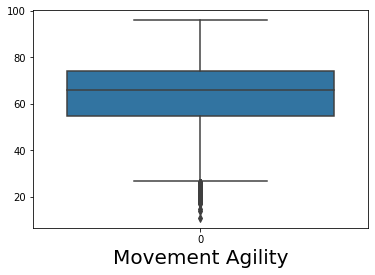

In [4]:
fig = sea.boxplot(data=fifa_20_players.movement_agility)
fig.set_xlabel('Movement Agility', fontsize=20)

Text(0.5, 0, 'Movement Agility')

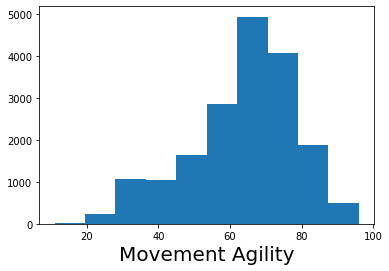

In [5]:
plt.hist(fifa_20_players.movement_agility)
plt.xlabel('Movement Agility', fontsize=20)

Text(0.5, 0, 'Skill Dribbling')

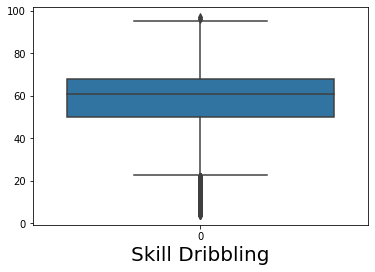

In [6]:
fig = sea.boxplot(data=fifa_20_players.skill_dribbling)
fig.set_xlabel('Skill Dribbling', fontsize=20)

Text(0.5, 0, 'Skill Dribbling')

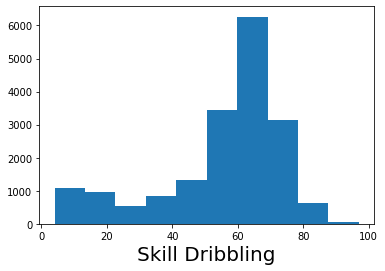

In [7]:
plt.hist(fifa_20_players.skill_dribbling)
plt.xlabel('Skill Dribbling', fontsize=20)

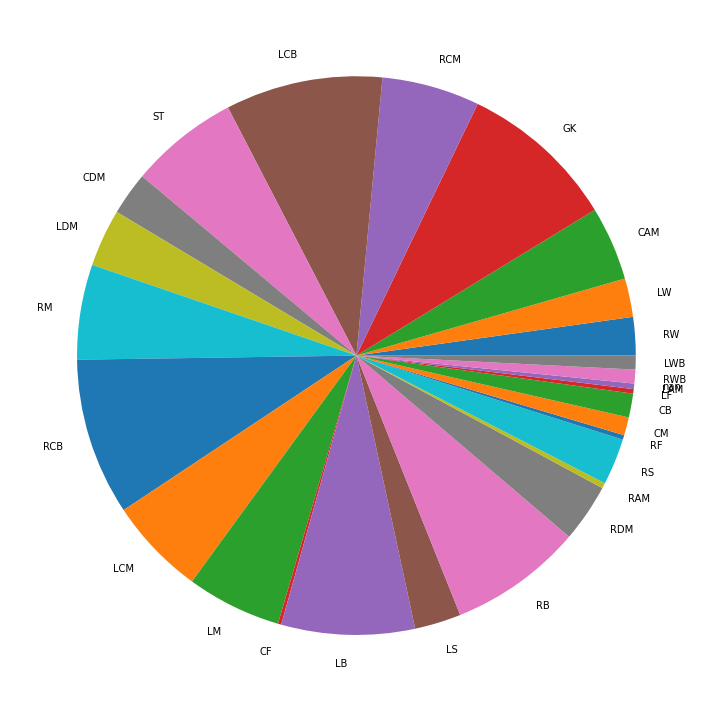

In [47]:
positions = list(fifa_20_players.team_position.unique())
positions.remove("SUB")
positions.remove("RES")


counts = []

for position in positions:
    counts.append(len(fifa_20_players[fifa_20_players['team_position']==position]))

fig = plt.figure(figsize =(10, 10))
plt.pie(counts, labels = positions)
plt.tight_layout()
plt.show()

In this hypothesis, we looked at differentiating the player position based on movement_agility and skill_dribbling. We have chosen two team positions - Central Attacking Midfielder (CAM) and Goalkeeper (GK). First, we plotted the data.

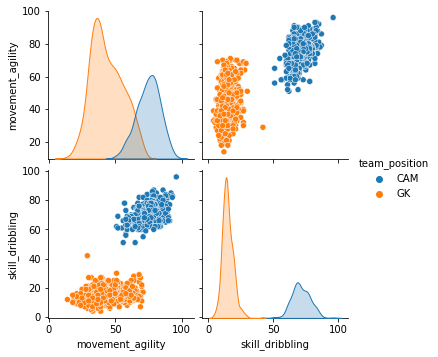

In [42]:
df = fifa_20_players[fifa_20_players['team_position'].isin(["CAM", "GK"])]

columns = ["movement_agility", "skill_dribbling"]
sea.pairplot(df, vars=columns, hue="team_position")
plt.show()

After visually confirming that player position should be classifiable, we separated the data into a test and train dataset.

In [43]:
X = df[["movement_agility", "skill_dribbling"]]
y = df.team_position

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
len(X_train)

681

In [45]:
len(X_test)

292

Then we traind a Support Vector Classification model.

In [46]:
svc_model = SVC(kernel='linear')

In [47]:
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
svc_model.score(X_test, y_test)

0.9965753424657534

The model's score is 99, which is very high.

In [49]:
w = svc_model.coef_[0]
b = svc_model.intercept_[0]
x_points = np.linspace(0, 100)
y_points = -(w[0] / w[1]) * x_points - b / w[1]

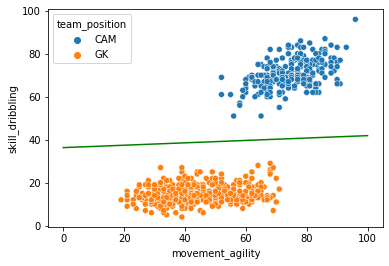

In [50]:
sea.scatterplot(x=X_train["movement_agility"], y=X_train["skill_dribbling"], hue=y)
plt.plot(x_points, y_points, c='g')

To visually verify the model, we have plotted the "test" data.

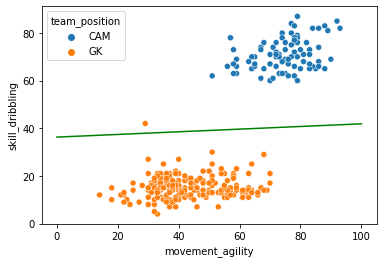

In [51]:
sea.scatterplot(x=X_test["movement_agility"], y=X_test["skill_dribbling"], hue=y)
plt.plot(x_points, y_points, c='g')